In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
file_path = 'smartphones.csv'
data = pd.read_csv(file_path)

In [29]:
ram_median = data['RAM'].median()
storage_median = data['Storage'].median()
data['RAM'] = data['RAM'].fillna(ram_median)
data['Storage'] = data['Storage'].fillna(storage_median)

In [30]:
print("\nMissing values after handling:")
print(data.isnull().sum())


Missing values after handling:
Smartphone     0
Brand          0
Model          0
RAM            0
Storage        0
Color          0
Free           0
Final Price    0
dtype: int64


In [31]:
stats = data.describe().loc[['mean', 'std', '50%']]
print("\nStatistical Summary:")
print(stats)


Statistical Summary:
           RAM     Storage  Final Price
mean  5.971366  162.175110   492.175573
std   2.285722  138.507038   398.606183
50%   6.000000  128.000000   349.990000


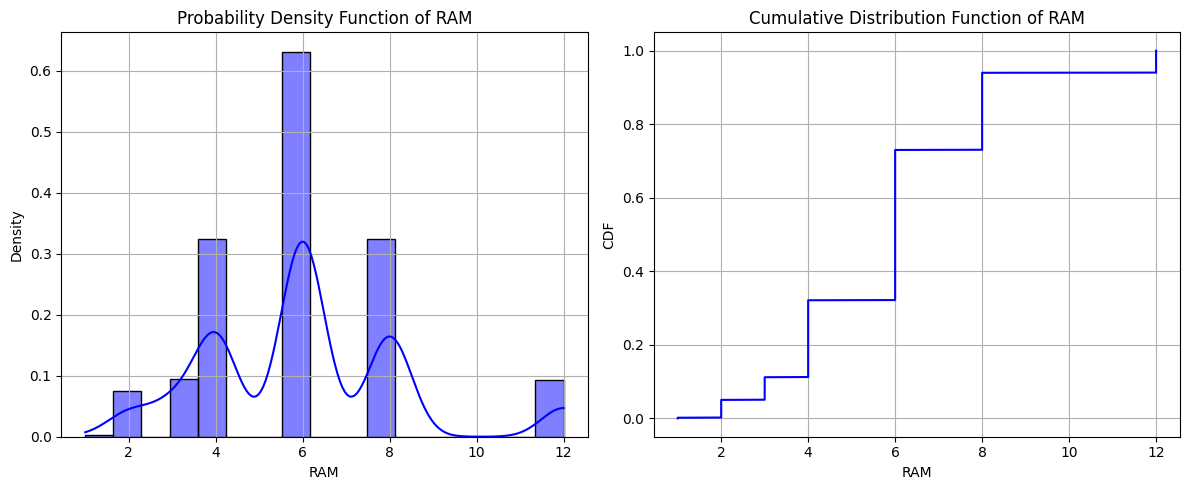

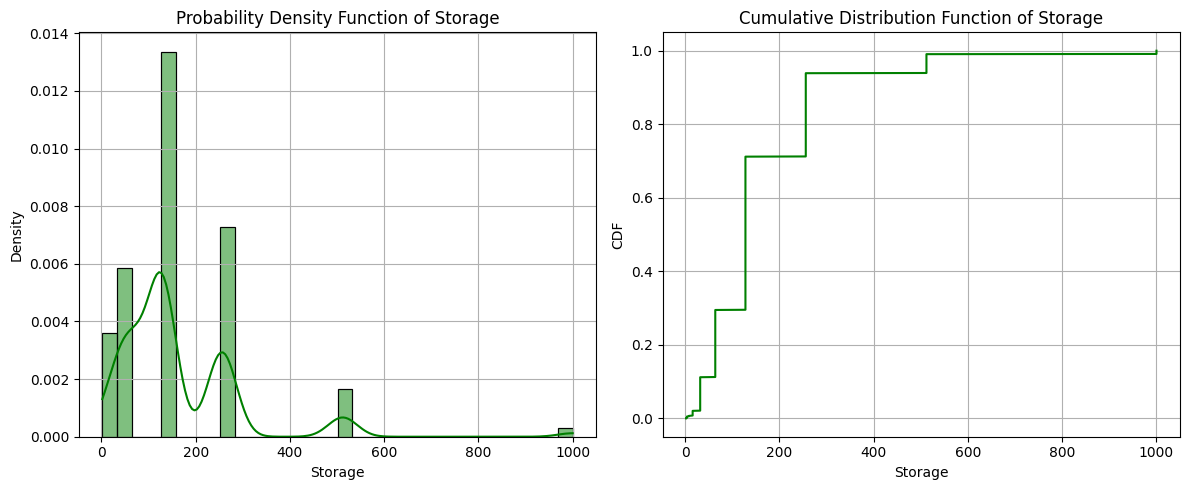

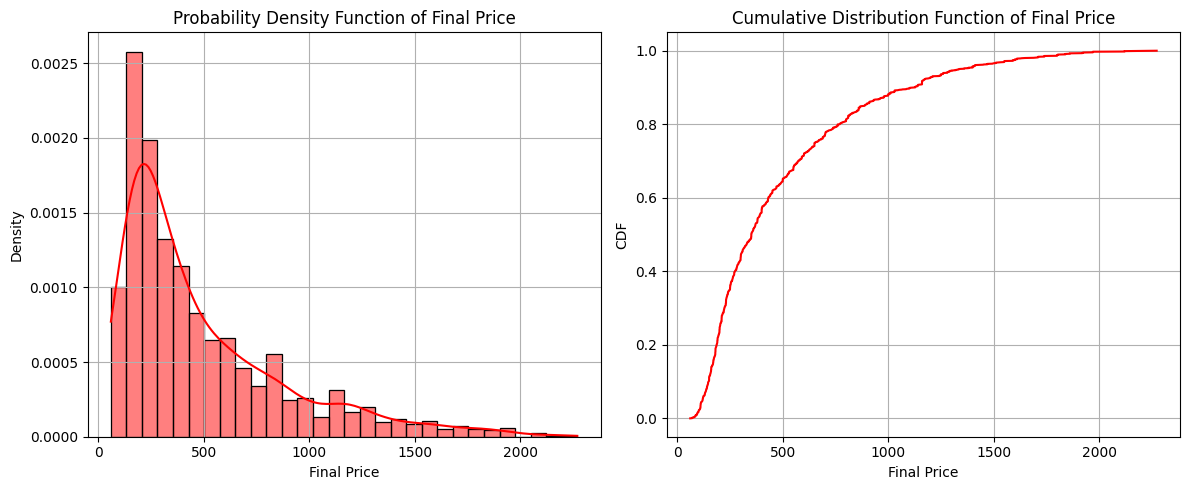

In [32]:
def plot_pdf_cdf(data, label, color, filename=None):
    plt.figure(figsize=(12, 5))

    # PDF
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True, color=color, stat="density")
    plt.title(f'Probability Density Function of {label}')
    plt.xlabel(label)
    plt.ylabel('Density')
    plt.grid(True)

    # CDF
    plt.subplot(1, 2, 2)
    data_sorted = np.sort(data)
    p = 1. * np.arange(len(data)) / (len(data) - 1)
    plt.plot(data_sorted, p, color=color)
    plt.title(f'Cumulative Distribution Function of {label}')
    plt.xlabel(label)
    plt.ylabel('CDF')
    plt.grid(True)

    plt.tight_layout()
    
    if filename:
        plt.savefig(filename)
    
    plt.show()

# Plot PDF, CDF, and histogram for RAM, Storage, and Price
plot_pdf_cdf(data['RAM'], 'RAM', 'blue', 'ram_distribution.png')
plot_pdf_cdf(data['Storage'], 'Storage', 'green', 'storage_distribution.png')
plot_pdf_cdf(data['Final Price'], 'Final Price', 'red', 'price_distribution.png')

In [9]:
correlation_ram_price = data['Final Price'].corr(data['RAM'])
correlation_storage_price = data['Final Price'].corr(data['Storage'])
print(f"\nCorrelation between Price and RAM: {correlation_ram_price:.2f}")
print(f"Correlation between Price and Storage: {correlation_storage_price:.2f}")



Correlation between Price and RAM: 0.44
Correlation between Price and Storage: 0.70


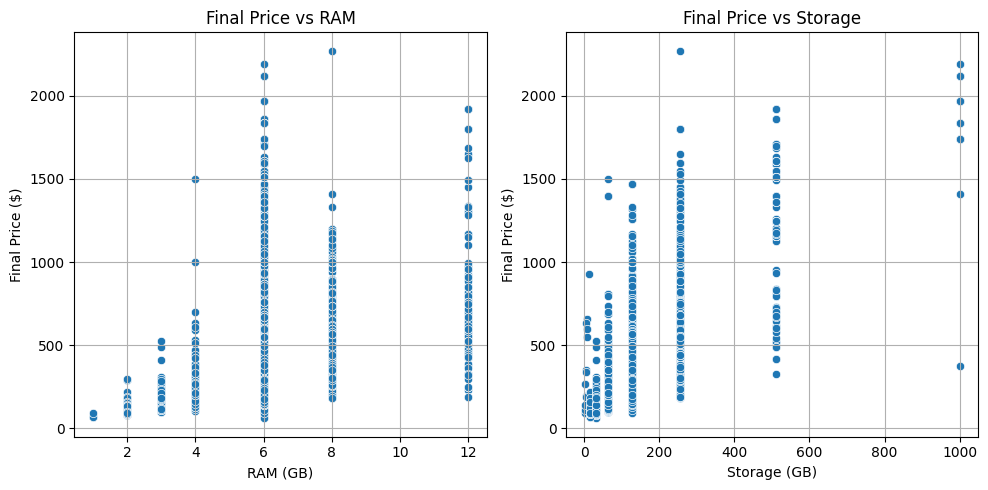

In [11]:
plt.figure(figsize=(10, 5))

# Scatter plot Price vs RAM
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['RAM'], y=data['Final Price'])
plt.title('Final Price vs RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Final Price ($)')
plt.grid(True)

# Scatter plot Final Price vs Storage
plt.subplot(1, 2, 2)
sns.scatterplot(x=data['Storage'], y=data['Final Price'])
plt.title('Final Price vs Storage')
plt.xlabel('Storage (GB)')
plt.ylabel('Final Price ($)')
plt.grid(True)

plt.tight_layout()
plt.show()
